### Violin plot

~~~python
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=200)

ax.violinplot(rewards)
plt.suptitle('Violin plot', x=0.195, y=0.95, fontsize=20, fontweight='bold', fontfamily='serif')
ax.set_title('The reward distribution for each socket', x=0.24, y=1.0, fontsize=12, fontfamily='serif', color='gray')
ax.grid(axis='y', linestyle='--', alpha=0.9)
plt.xlabel('Socket', fontsize=12)
plt.ylabel('Reward distribution (seconds of charge)', fontsize=12)
plt.tight_layout()
plt.savefig('violinplot.png')
plt.show()
~~~

![violinplot](./img/violinplot.png)

### Heatmap
- Change the label's color of the colorbar in a heatmap
- Make the shape of a heatmap square
- Shrink the length of the colorbar

~~~python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 11
x = np.linspace(-1, 1, n)
fx = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        fx[i, j] = x[i] + x[j]

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100, facecolor='black')

hm = sns.heatmap(fx, cmap='Blues', square=True, cbar_kws={'shrink': 0.75}, ax=ax)

# title
ax.set_title("How to change the label's color\n of the colorbar in the heatmap?", color='white', fontsize=14, fontweight='bold', fontfamily='sans-serif')

# ticks
ticks = [f'{i:.1f}' for i in x]
ax.set_xticklabels(ticks, color='white', fontweight='bold')
ax.set_yticklabels(ticks, color='white', rotation='horizontal', fontweight='bold')

# colorbar
cb = hm.collections[0].colorbar
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white', fontweight='bold')

plt.tight_layout()
plt.show(fig)
~~~

![heatmap](./img/heatmap.png)

### Burger's equation
- 범례 (legend)를 그래프 밖으로 옮기기 (`bbox_to_anchor`)
- xlabel, ylabel에 수식 쓰기

~~~python
# Figure from http://www.thevisualroom.com/burgers_equation.html
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 5.5))

colour = iter(mpl.cm.rainbow(np.linspace(0, 20, NT)))
for t in range(0, NT, 20):
    c = next(colour)
    ax.plot(X, u_analytic[t, :], linestyle = '-', c=c, label=f'time={t}, true')
    ax.plot(X, u[t, :],'o', c='black', markersize=3, alpha=0.4, label=f'time={t}, approx')

ax.legend(fontsize=11.64, bbox_to_anchor=(1, 1.01))

plt.title("The solution and the first order approximation\n of the Burger's equation", fontsize=16)
plt.ylabel("$u(x, t)$", fontsize=14)
plt.xlabel("spatial domain $x$", fontsize=14)
plt.tight_layout()
plt.show() 
~~~

![burger](./img/burger.png)

### 코로나19 확진자 동향 데이터, 네이버처럼 그리기
- annotation 달기
    - 숫자 천 단위로 콤마 찍기
- figure의 왼쪽, 오른쪽 축 제거 및 위, 아래 축 색 변경

~~~python
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(x=df['날짜'].astype(str), height=df['일별확진자'], width=0.1, color='#FFE3E3')

# Annotate frequncies
for i, freq in enumerate(df['일별확진자'].values):
    if len(str(freq)) == 3:
        x = i - 0.18
    else:
        x = i - 0.3
    plt.text(x=x, y=freq+40, s=f'{freq:,}', fontdict={'fontsize':12, 'color':'gray', 'fontweight': 'bold'})
 
# Remove side edges
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1400)
plt.grid(axis='y', color='gray')
plt.show()
~~~
![corona](./img/corona.jpg)

### 깔끔한 축 디자인
- `spines.top.set_visible(False)`: 그림이 담기는 틀의 위쪽 선을 제거
- `spines.right.set_visible(False)`: 그림이 담기는 틀의 오른쪽 선을 제거
- `spines.left.set_bounds(-0.4, 1)`: 그림이 담기는 틀의 왼쪽 선이 나타나는 구간 설정
- `spines.bottom.set_bounds(0, 1)`: 그림이 담기는 틀의 아래쪽 선이 나타나는 구간 설정
- 옛날에는 marker가 이쁜지 몰랐는데, 꽤 이쁘다.

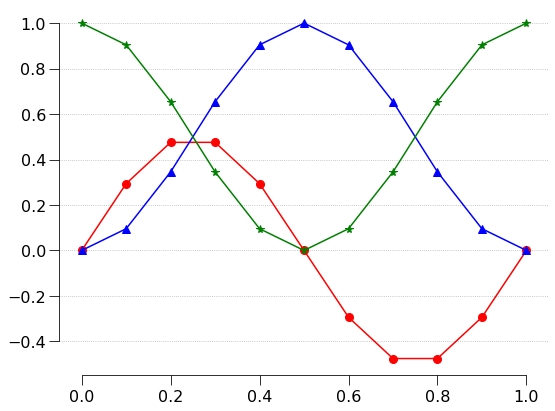

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['lines.markersize'] = 8

x = np.linspace(0, 1.0, 11)
f = np.sin(np.pi * x) * np.cos(np.pi * x)
g = np.sin(np.pi * x) ** 2
h = np.cos(np.pi * x) ** 2

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, f, 'r', marker='o')
ax.plot(x, g, 'b', marker='^')
ax.plot(x, h, 'g', marker='*')

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_bounds(-0.4, 1)
ax.spines.bottom.set_bounds(0, 1)
ax.tick_params(length=10)
ax.grid(axis='y', linestyle='dotted')

plt.tight_layout()
plt.show()